In [53]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

from experiments_core import run_tests_splits
from experiments_core import run_one_experiment
from experiments_core import print_baseline_results
from experiments_core import default_tokenize
from experiments_core import tokenize_stems
from experiments_core import tokenize_lemmas
from experiments_core import tokenize_no_urls
from experiments_core import tokenize_norm_letters

from nltk.corpus import stopwords

%matplotlib inline

In [54]:
import importlib
import sys
importlib.reload(sys.modules[run_tests_splits.__module__])
importlib.reload(sys.modules[run_one_experiment.__module__])
importlib.reload(sys.modules[print_baseline_results.__module__])
importlib.reload(sys.modules[default_tokenize.__module__])
importlib.reload(sys.modules[tokenize_stems.__module__])
importlib.reload(sys.modules[tokenize_lemmas.__module__])
importlib.reload(sys.modules[tokenize_no_urls.__module__])
importlib.reload(sys.modules[tokenize_norm_letters.__module__])

<module 'experiments_core' from '/home/ctorres9/EAFIT/trabajogrado/experiments/experiments_core.py'>

In [3]:
file_path = 'data/TweetsPolaridadSEPLN.csv'
original_tweets_df = pd.read_csv(file_path, index_col=None, header=0, sep='\t')
print(original_tweets_df.describe())
print(original_tweets_df.head())

                      tweetid          user               content  \
count                   60798         60798                 60798   
unique                  60798           158                 60405   
top      154993892859715584,0  mariviromero  Buenos días a todos!   
freq                        1          7138                   111   

                       date   lang polarity  topic  
count                 60798  60798    60798  60798  
unique                60510      1        6     10  
top     2012-01-01T00:00:16     es     NONE  otros  
freq                      4  60798    21416  28189  
                 tweetid            user  \
0   142378325086715904,0     jesusmarana   
1   142379080808013824,0       EvaORegan   
2   142379173120442368,0  LosadaPescador   
3   142379815708803072,0    mgilguerrero   
4   142381190123499520,0  pedroj_ramirez   

                                             content                 date  \
0  Portada 'Público', viernes. Fabra al banquil

In [4]:
strong_negative_tweets = original_tweets_df[original_tweets_df.polarity == 'N+'][['content','polarity']]
standar_negative_tweets = original_tweets_df[original_tweets_df.polarity == 'N'][['content','polarity']]

strong_positive_tweets = original_tweets_df[original_tweets_df.polarity == 'P+'][['content','polarity']]
standar_positive_tweets = original_tweets_df[original_tweets_df.polarity == 'P'][['content','polarity']]

negative_tweets = pd.concat([strong_negative_tweets,standar_negative_tweets], ignore_index=True)
positive_tweets = pd.concat([strong_positive_tweets,standar_positive_tweets], ignore_index=True)

negative_tweets.polarity = "negative"
positive_tweets.polarity = "positive"

total_tweets = pd.concat([negative_tweets,positive_tweets], ignore_index=True)
print(total_tweets.describe())
print(total_tweets.head())

                                                  content  polarity
count                                               38077     38077
unique                                              37926         2
top     ¡Noticias descombacantes! está disponible! htt...  positive
freq                                                   63     22233
                                             content  polarity
0  Dado q la deuda privada es superior a la publi...  negative
1  TEPCO inyecta nitrógeno en los reactores de Fu...  negative
2  “@Declaracion: «Cualquier injusticia contra un...  negative
3  ¡Qué estrés!, la presidenta de la diputación d...  negative
4  Hoy entrego mi credencial en el Congreso. Una ...  negative


In [5]:
total_data_content = total_tweets.content
total_data_target = total_tweets.polarity

In [6]:
X_train, X_test, y_train, y_test = train_test_split(total_data_content, 
                                                    total_data_target, 
                                                    test_size=0.3, 
                                                    random_state=80)

In [7]:
print("Positivos entrenamiento:", len(y_train[y_train == 'positive']))
print("Negativos entrenamiento:", len(y_train[y_train == 'negative']))
print("Positivos pruebas:", len(y_test[y_test == 'positive']))
print("Negativos pruebas:", len(y_test[y_test == 'negative']))

Positivos entrenamiento: 15552
Negativos entrenamiento: 11101
Positivos pruebas: 6681
Negativos pruebas: 4743


# Experimentos con el clasificador SVM radial y el metodo de ponderacion binario
Los siguientes son los experimentos realizados para el clasificador SVM con kernel radial y con el metodo de ponderación para el modelo de espacio vectorial binario

# Linea base

In [8]:
binary_vect_baseline = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True)

In [9]:
parameters_svm_rbf = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}

In [10]:
%%time
tf_baseline_results = run_tests_splits(total_data_content, total_data_target, binary_vect_baseline, parameters_svm_rbf, SVC())

random state:  10
train time: 2009.065s
random state:  20
train time: 2223.765s
random state:  30
train time: 2210.670s
random state:  40
train time: 2180.021s
random state:  50
train time: 2142.628s
random state:  60
train time: 2131.703s
random state:  70
train time: 2062.125s
random state:  80
train time: 2348.018s
random state:  90
train time: 2152.018s
random state:  100
train time: 2118.093s
CPU times: user 1h 4min 22s, sys: 1min 21s, total: 1h 5min 44s
Wall time: 6h 3min 6s


In [13]:
binary_baseline_results = tf_baseline_results

Numero de caracteristicas:  (26653, 48372)

Best score selected:  0.905451543916257
Best Accuracy:  0.8988095238095238
Best Best F1-score:  0.895603416581652
Best random state:  30
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.905451543916257
C: 100
gamma: 0.001
kernel: 'rbf'


Exactitud: 0.8988095238095238
F1_score: 0.895603416581652
Precision: 0.8969869251464275
Recall: 0.8943816499745969

             precision    recall  f1-score   support

   negative     0.8871    0.8677    0.8773      4763
   positive     0.9069    0.9210    0.9139      6661

avg / total     0.8986    0.8988    0.8986     11424

[[4133  630]
 [ 526 6135]]

Confusion matrix, without normalization
[[4133  630]
 [ 526 6135]]


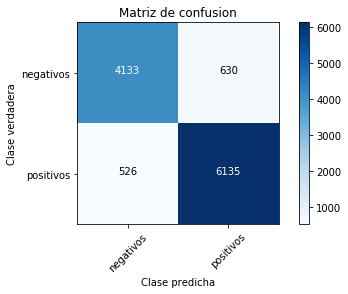

In [14]:
print_baseline_results(binary_baseline_results, parameters_svm_rbf)

In [58]:
all_experiments_results = []

## Prueba de la linea base con los parametros optimos
Esta prueba se hace para validar los resultados obtenidos anteriormente. Si esta bien debe dar lo mismo o un resultado muy similar dependiendo del clasificador.

Numero de caracteristicas:  (26653, 48372)

train time: 484.431s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.905451543916257
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8988095238095238
F1_score: 0.895603416581652
Precision: 0.8969869251464275
Recall: 0.8943816499745969

             precision    recall  f1-score   support

   negative     0.8871    0.8677    0.8773      4763
   positive     0.9069    0.9210    0.9139      6661

avg / total     0.8986    0.8988    0.8986     11424

[[4133  630]
 [ 526 6135]]

Confusion matrix, without normalization
[[4133  630]
 [ 526 6135]]
CPU times: user 3min 43s, sys: 3.34 s, total: 3min 46s
Wall time: 8min 40s


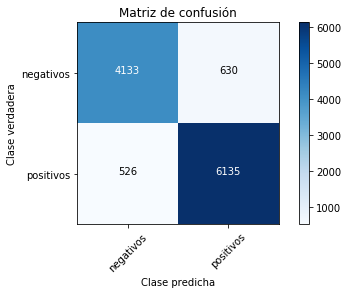

In [59]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_binary_vect_baseline = run_one_experiment(total_data_content, total_data_target, binary_vect_baseline, optimal_parameters, SVC(), 30)
all_experiments_results.append(clf_binary_vect_baseline)

## Experimento 1: Remocion de stop words

In [60]:
spanish_stopwords = stopwords.words('spanish')

In [61]:
binary_vect_stopwords = CountVectorizer(stop_words = spanish_stopwords,
                                        analyzer = 'word',
                                        tokenizer = default_tokenize,
                                        lowercase = True,
                                        binary=True)

Numero de caracteristicas:  (26653, 48118)

train time: 304.229s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8907815255318351
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8919817927170869
F1_score: 0.8881966356371416
Precision: 0.8911512360318472
Recall: 0.8858645006769297

             precision    recall  f1-score   support

   negative     0.8870    0.8490    0.8676      4763
   positive     0.8953    0.9227    0.9088      6661

avg / total     0.8918    0.8920    0.8916     11424

[[4044  719]
 [ 515 6146]]

Confusion matrix, without normalization
[[4044  719]
 [ 515 6146]]
CPU times: user 2min 44s, sys: 2.32 s, total: 2min 47s
Wall time: 5min 32s


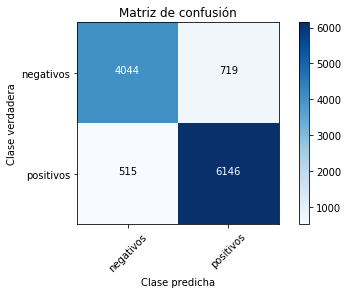

In [62]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_binary_vect_stopwords = run_one_experiment(total_data_content, total_data_target, binary_vect_stopwords, optimal_parameters, SVC(), 30)
all_experiments_results.append(clf_binary_vect_stopwords)

## Experimento 2: Stemming

In [63]:
#Prueba de los metodos anteriores
print(tokenize_stems(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaa', 'com', 'estas', 'estaa', 'cre', 'en', 'mi', 'si', 'llov', 'mañan', 'tu', 'cre', 'en', 'mi', 'cart', 'aeiou']


In [64]:
binary_vect_stemming = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True,
                binary=True)

Numero de caracteristicas:  (26653, 32850)

train time: 322.075s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9075901399467227
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.9036239495798319
F1_score: 0.9006609064402906
Precision: 0.9016397554173794
Recall: 0.899766465362869

             precision    recall  f1-score   support

   negative     0.8906    0.8765    0.8835      4763
   positive     0.9127    0.9230    0.9178      6661

avg / total     0.9035    0.9036    0.9035     11424

[[4175  588]
 [ 513 6148]]

Confusion matrix, without normalization
[[4175  588]
 [ 513 6148]]
CPU times: user 2min 57s, sys: 2.52 s, total: 3min
Wall time: 6min 11s


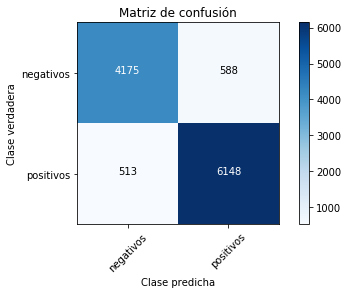

In [65]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_binary_vect_stemming = run_one_experiment(total_data_content, total_data_target, binary_vect_stemming, optimal_parameters, SVC(), 30)
all_experiments_results.append(clf_binary_vect_stemming)

## Experimento 3: Lematizacion

In [66]:
# Prueba del tokenizer
print(tokenize_lemmas(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaaa', 'comer', 'este', 'estaaaas', 'creer', 'en', 'mi', 'si', 'llover', 'mañana', 'tu', 'creer', 'en', 'mi', 'carta', 'aeiou']


In [67]:
binary_vect_lemmatize = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True,
                binary=True)

Numero de caracteristicas:  (26653, 36771)

train time: 341.429s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.90789029377556
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.9059873949579832
F1_score: 0.9032193942863505
Precision: 0.9036459289929409
Recall: 0.9028101978220433

             precision    recall  f1-score   support

   negative     0.8900    0.8837    0.8869      4763
   positive     0.9173    0.9219    0.9196      6661

avg / total     0.9059    0.9060    0.9059     11424

[[4209  554]
 [ 520 6141]]

Confusion matrix, without normalization
[[4209  554]
 [ 520 6141]]
CPU times: user 2min 51s, sys: 2.52 s, total: 2min 53s
Wall time: 6min 15s


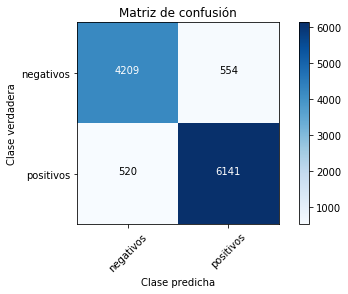

In [68]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_binary_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, binary_vect_lemmatize, optimal_parameters, SVC(), 30)
all_experiments_results.append(clf_binary_vect_lemmatize)

## Experimento 4: Remocion de URLs

In [69]:
# Prueba de la tokenizacion sin urls
print(tokenize_no_urls(
    "holaaaa cómo http://estas creerías https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python mi si lloviera \t  mañana, tu crees en mi cartas ¡¡ ¿¿. aeiou"))

['holaaaa', 'cómo', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [70]:
binary_vect_no_urls = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True,
                binary=True)

Numero de caracteristicas:  (26653, 40441)

train time: 458.306s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9048137170299778
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8999474789915967
F1_score: 0.8967872200038297
Precision: 0.8981303841552288
Recall: 0.8955967758401906

             precision    recall  f1-score   support

   negative     0.8882    0.8694    0.8787      4763
   positive     0.9080    0.9218    0.9148      6661

avg / total     0.8998    0.8999    0.8998     11424

[[4141  622]
 [ 521 6140]]

Confusion matrix, without normalization
[[4141  622]
 [ 521 6140]]
CPU times: user 4min 2s, sys: 3.61 s, total: 4min 6s
Wall time: 8min 15s


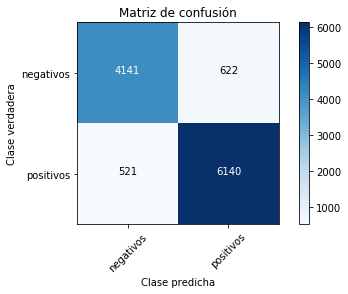

In [71]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_binary_vect_no_urls = run_one_experiment(total_data_content, total_data_target, binary_vect_no_urls, optimal_parameters, SVC(), 30)
all_experiments_results.append(clf_binary_vect_no_urls)

## Experimento 5: Remocion de letras repetidas

In [72]:
print(tokenize_norm_letters(
    "holaaaa cómo http://estas estaaaas creerías mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['hola', 'cómo', 'htp', 'estas', 'estas', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [73]:
binary_vect_norm_letters = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True,
                binary=True)

Numero de caracteristicas:  (26653, 47582)

train time: 454.784s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9050763516302105
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.9000350140056023
F1_score: 0.8968677350659573
Precision: 0.8982555281269022
Recall: 0.8956419275931046

             precision    recall  f1-score   support

   negative     0.8886    0.8692    0.8788      4763
   positive     0.9079    0.9221    0.9149      6661

avg / total     0.8999    0.9000    0.8999     11424

[[4140  623]
 [ 519 6142]]

Confusion matrix, without normalization
[[4140  623]
 [ 519 6142]]
CPU times: user 3min 50s, sys: 2.82 s, total: 3min 53s
Wall time: 8min 17s


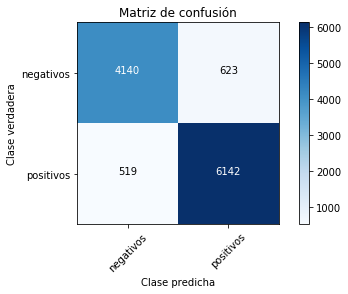

In [74]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_binary_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, binary_vect_norm_letters, optimal_parameters, SVC(), 30)
all_experiments_results.append(clf_binary_vect_norm_letters)

## Experimento 6: Remocion de terminos poco comunes (pruning < 10)

In [75]:
binary_vect_pruning10 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True,
                min_df=10)

Numero de caracteristicas:  (26653, 4348)

train time: 216.408s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8978726597381158
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8927696078431373
F1_score: 0.889554959220593
Precision: 0.890185406468611
Recall: 0.8889629510719215

             precision    recall  f1-score   support

   negative     0.8754    0.8661    0.8707      4763
   positive     0.9049    0.9119    0.9084      6661

avg / total     0.8926    0.8928    0.8927     11424

[[4125  638]
 [ 587 6074]]

Confusion matrix, without normalization
[[4125  638]
 [ 587 6074]]
CPU times: user 1min 53s, sys: 2.29 s, total: 1min 55s
Wall time: 4min 4s


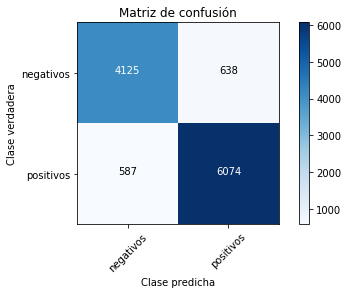

In [76]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_binary_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, binary_vect_pruning10, optimal_parameters, SVC(), 30)
all_experiments_results.append(clf_binary_vect_pruning10)

## Experimento 7: Remocion de terminos poco comunes (pruning < 5)

In [77]:
binary_vect_pruning5 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True,
                min_df=5)

Numero de caracteristicas:  (26653, 7854)

train time: 272.658s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9036131017146287
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8953081232492998
F1_score: 0.8921129079610008
Precision: 0.8929751867957916
Recall: 0.8913192737026137

             precision    recall  f1-score   support

   negative     0.8799    0.8673    0.8735      4763
   positive     0.9061    0.9153    0.9107      6661

avg / total     0.8952    0.8953    0.8952     11424

[[4131  632]
 [ 564 6097]]

Confusion matrix, without normalization
[[4131  632]
 [ 564 6097]]
CPU times: user 2min 8s, sys: 2.38 s, total: 2min 11s
Wall time: 5min 2s


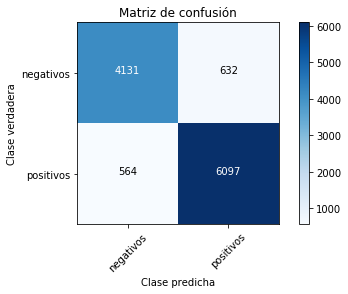

In [78]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_binary_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, binary_vect_pruning5, optimal_parameters, SVC(), 30)
all_experiments_results.append(clf_binary_vect_pruning5)

In [82]:
len(all_experiments_results)

8

In [80]:
import xlsxwriter

In [81]:
# Create a workbook and add a worksheet.
# workbook = xlsxwriter.Workbook('result_es_twitter_sa_svm_rbf_binary.xlsx')
# worksheet = workbook.add_worksheet()
# row = 0
# col = 0
# for exp in all_experiments_results:
#     worksheet.write(row, col, exp[0])
#     row += 1
#     worksheet.write(row, col, exp[1])
#     row += 1
#     worksheet.write(row, col, exp[2])
#     row += 1
#     worksheet.write(row, col, exp[3])
#     row += 1
#     worksheet.write(row, col, exp[4])
#     row += 1
#     worksheet.write(row, col, exp[5])
#     row += 1
#     worksheet.write(row, col, exp[6])
#     row += 1
#     worksheet.write(row, col, exp[7])
#     row += 1
#     worksheet.write(row, col, exp[8])
#     row += 1
#     row = 0
#     col += 1
# workbook.close()